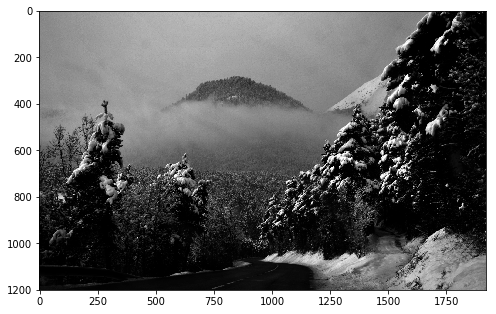

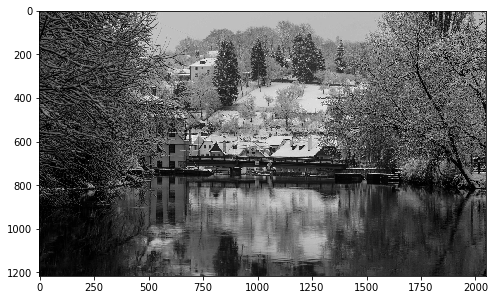

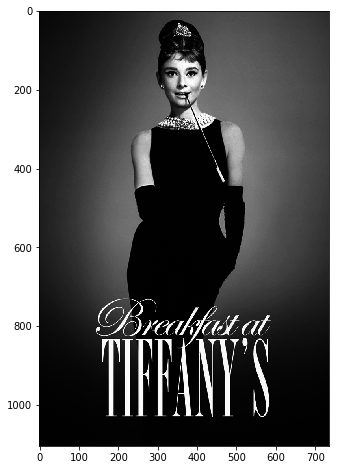

In [10]:
# Tiago Moreira Trocoli da Cunha
# numero: 226078

# Note1: it is better to visualize images outside of
# the notebook so you can zoom in to see them better.

# Utility libraries and functions

import cv2
import scipy as sp
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mat
import imageio
from __future__ import division # force floating division in python 2.7

# display all images
def display_images(images, scales):
    n = len(images)
    for i in range(n):
        plt.figure(figsize = scales[i])
        plt.imshow(images[i], cmap=cm.gray)
        plt.show()


# considreing square matrix, n=m
# given a mask nXn, returns nXn + 1 matrices of nXn 
def create_pattern(mask):
    (n,m) = mask.shape
    pattern = np.zeros((n*n+1,n,n),dtype=np.uint8)
    for num in range(n*n+1):
        for i in range(n):
            for j in range(n):
                if num > mask[i][j]:
                    pattern[num][i][j] = 1
    return pattern        


# convert pixels' intensities from 0-255 to 0-n
def convert_baseN(image,n):
    num = 256/n
    return np.round(image/num).astype(np.uint8)

# allocate external edges of zeros values.
# one external row and columns
def allocate_edges(image):
    (M,N) = image.shape
    img_of_external_edges = np.zeros((M+1,N+1), dtype = np.uint8)
    img_of_external_edges[0:M,0:N] = image[0:M,0:N]
    return img_of_external_edges


# Load Images
image1 = cv2.imread('forest.pgm',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('winter.pgm',cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('AndrewHepburn.pgm',cv2.IMREAD_GRAYSCALE)

display_images([image1, image2, image3], [[8,8],[8,8],[8,8]])

In [2]:
# Half-toning filter

mask1 = np.array([[6,8,4],[1,0,3],[5,2,7]], dtype = np.uint8)

def half_toning(image):
    pattern   = create_pattern(mask1)
    (M,N)     = image.shape
    # convert intensity from 0-255 to 0-9
    image     = convert_baseN(image,9)
    # create image 3 times bigger made up of zeros
    new_image = np.zeros((3*M, 3*N),dtype=np.uint8)
    for i in range(M):
        for j in range(N):
            new_image[3*i:3*(i+1),3*j:3*(j+1)]= pattern[image[i][j]]
    return new_image*255
 
# apply half-toning
image1_hf = half_toning(image1)
cv2.imwrite("forest_half_toning.pbm", image1_hf)
image2_hf = half_toning(image2)
cv2.imwrite("winter_half_toning.pbm", image2_hf)
image3_hf = half_toning(image3)
cv2.imwrite("AndrewHepburn_half_toning.pbm", image3_hf)

True

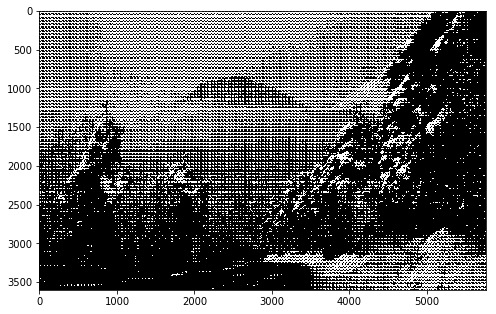

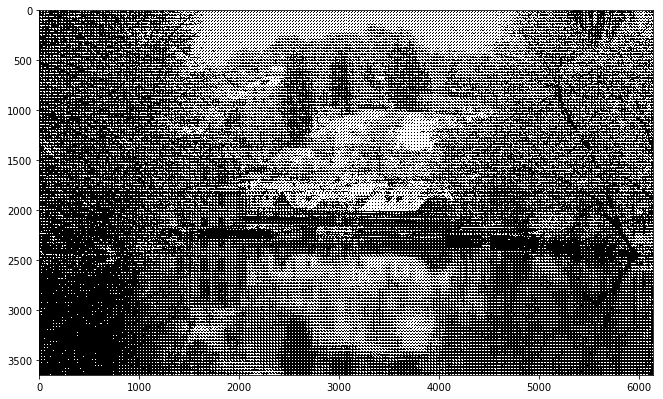

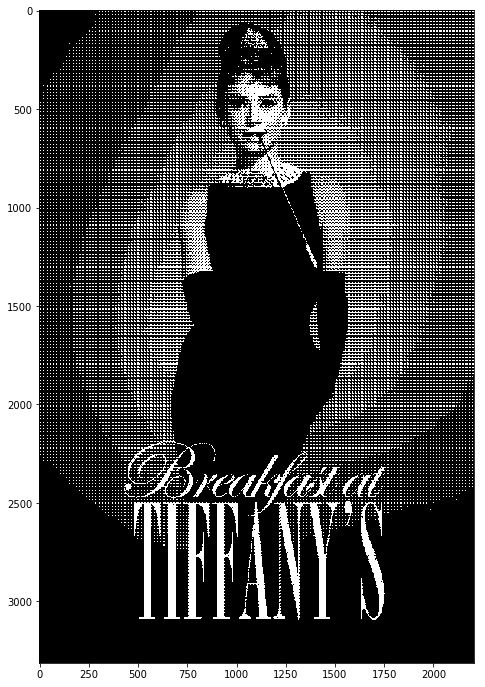

In [3]:
# Show images after applying Half-toning filter
# I need to re-scale to have a better visualization 
display_images([image1_hf, image2_hf, image3_hf], [[8,8],[11,11],[12,12]])

In [4]:
mask2 = np.array([[0,12,3,15],[8,4,11,7],[2,14,1,13],[10,6,9,5]], dtype = np.uint8)

# bayer mask
def bayer(image):
    pattern   = create_pattern(mask2)
    (M,N)     = image.shape
    # convert intensity from 0-255 to 0-16
    image     = convert_baseN(image,16)
    # create image 4 times bigger made up of zeros
    new_image = np.zeros((4*M, 4*N),dtype=np.uint8)
    for i in range(M):
        for j in range(N):
            new_image[4*i:4*(i+1),4*j:4*(j+1)]= pattern[image[i][j]]
    return new_image*255
 
# apply bayer mask
image1_bayer = bayer(image1)
cv2.imwrite("forest_bayer.pbm", image1_bayer)
image2_bayer = bayer(image2)
cv2.imwrite("winter_bayer.pbm", image2_bayer)
image3_bayer = bayer(image3)
cv2.imwrite("AndrewHepburn_bayer.pbm", image3_bayer)

True

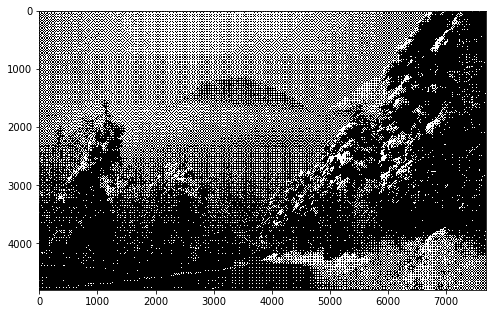

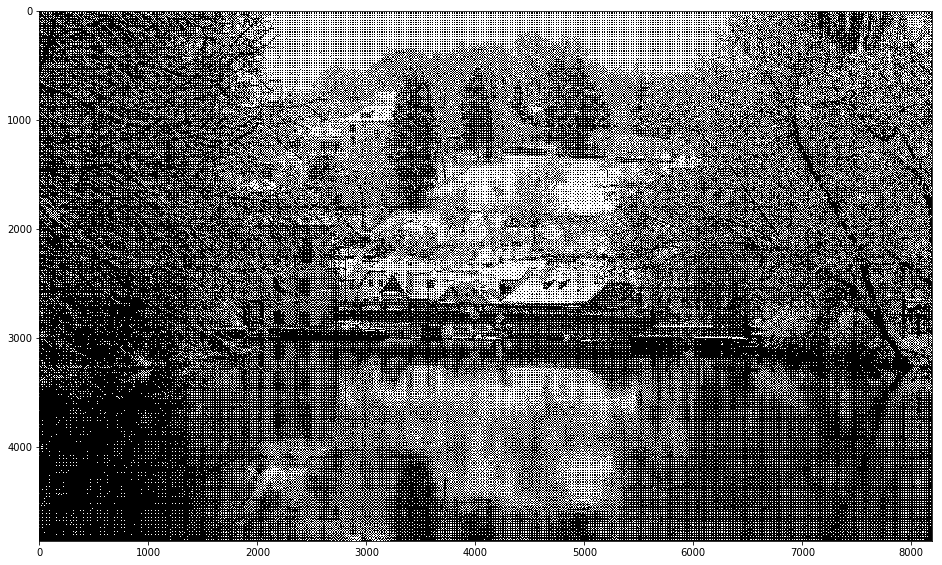

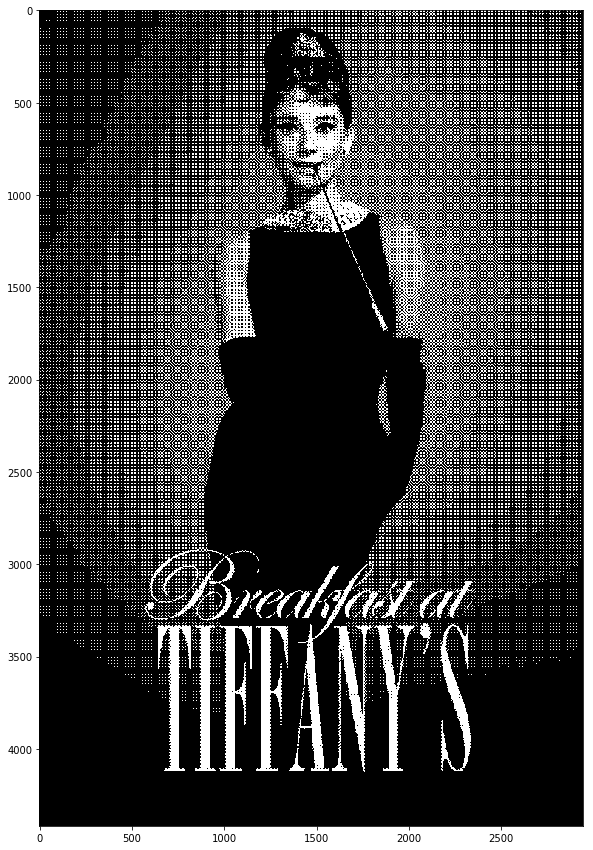

In [5]:
# Show images after applying Bayer mask
# I need to re-scale to have a better visualization 
display_images([image1_bayer, image2_bayer, image3_bayer], [[8,8],[16,16],[15,15]])

In [6]:
# floyd steinberg with zig-zag
def floyd_steinberg_zig_zag(image):
    
    (M,N)      = image.shape
    image      = allocate_edges(image)
    new_image  = np.zeros((M+1,N+1), dtype = np.uint8)
    
    for i in range(M):
        if(i%2 == 0):
            start, end, step = (0,N,1)
        else:
            start, end, step = (N-1,-1,-1)    
        for j in range(start, end, step):
            if image[i][j] >= 128:
                new_image[i][j] = 1
            error          = image[i][j] - new_image[i][j]*255
            image[i+1,j]   = image[i+1,j] + (7/16)*error
            image[i-1,j+1] = image[i-1,j+1] + (3/16)*error
            image[i,j+1]   = image[i,j+1] + (5/16)*error
            image[i+1,j+1] = image[i+1,j+1] + (1/16)*error
        
    return (new_image[0:M,0:N]*255).astype(np.uint8)
            
# apply floyd_steinberg_zig_zag
image1_fs_zz = floyd_steinberg_zig_zag(image1)
cv2.imwrite("forest_floyd_steinberg_zig_zag.pbm", image1_fs_zz)
image2_fs_zz = floyd_steinberg_zig_zag(image2)
cv2.imwrite("winter_floyd_steinberg_zig_zag.pbm", image2_fs_zz)
image3_fs_zz = floyd_steinberg_zig_zag(image3)
cv2.imwrite("AndrewHepburn_floyd_steinberg_zig_zag.pbm", image3_fs_zz)

True

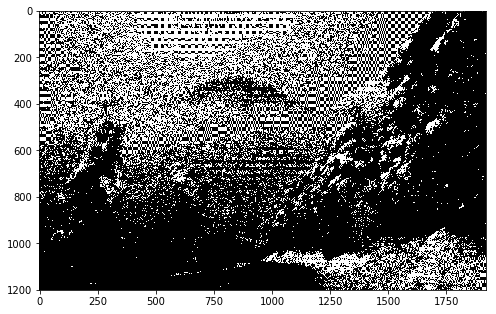

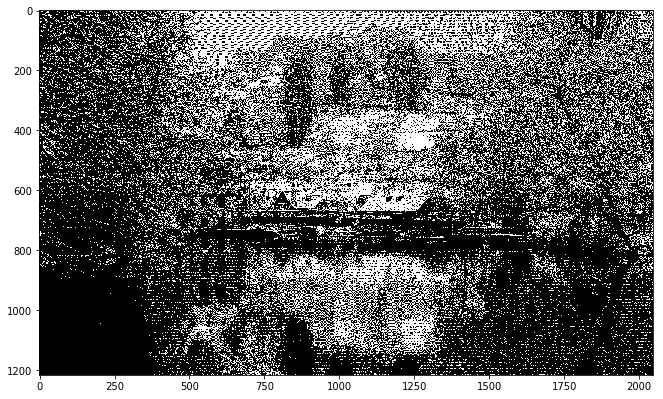

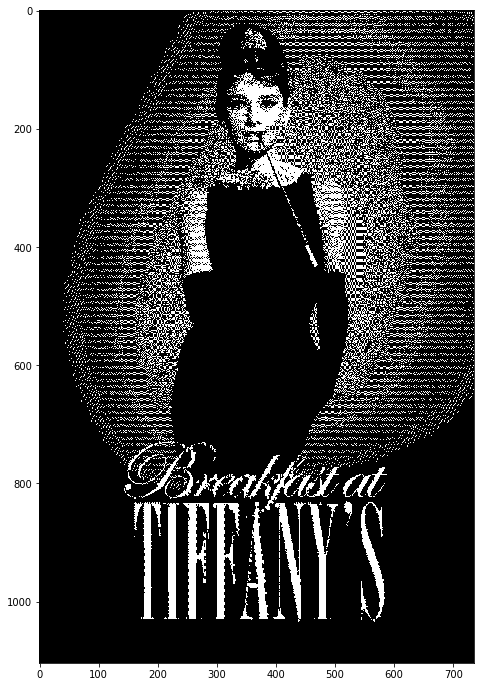

In [7]:
# Show images after applying floyd_steinberg_zig_zag
display_images([image1_fs_zz, image2_fs_zz, image3_fs_zz], [[8,8],[11,11],[12,12]])

In [8]:
#floyd_steinberg without zig-zag
def floyd_steinberg(image):
    
    (M,N)             = image.shape
    image             = allocate_edges(image)
    new_image         = np.zeros((M+1,N+1), dtype = np.uint8) 
    
    for i in range(M):   
        for j in range(N):
            if image[i][j] >= 128:
                new_image[i][j] = 1
            error          = image[i][j] - new_image[i][j]*255
            image[i+1,j]   = image[i+1,j] + (7/16)*error
            image[i-1,j+1] = image[i-1,j+1] + (3/16)*error
            image[i,j+1]   = image[i,j+1] + (5/16)*error
            image[i+1,j+1] = image[i+1,j+1] + (1/16)*error
    return (new_image[0:M,0:N]*255).astype(np.uint8)
            
# apply floyd_steinberg_zig_zag
image1_fs = floyd_steinberg(image1)
cv2.imwrite("forest_floyd_steinberg.pbm", image1_fs)
image2_fs = floyd_steinberg(image2)
cv2.imwrite("winter_floyd_steinberg.pbm", image2_fs)
image3_fs = floyd_steinberg(image3)
cv2.imwrite("AndrewHepburn_floyd_steinberg.pbm", image3_fs)

True

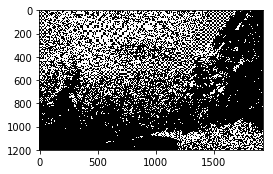

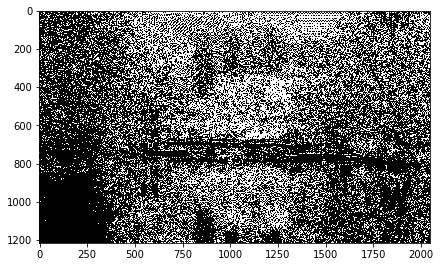

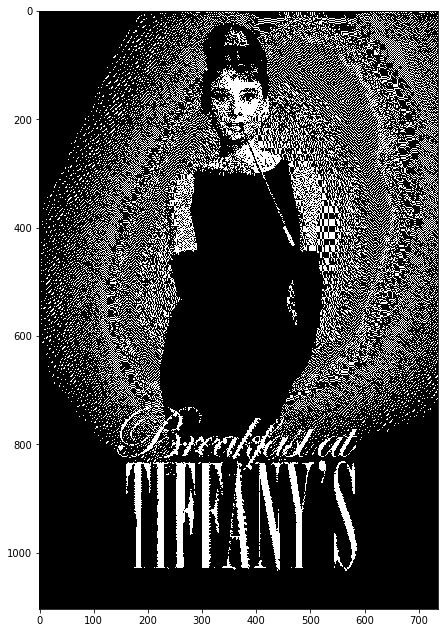

In [9]:
# Show images after applying floyd_steinberg without zig-zag
display_images([image1_fs, image2_fs, image3_fs], [[4,4],[7,7],[11,11]])